In [ ]:
import numpy as np
import copy
import matplotlib.pyplot as plt
from testCases_v2 import *
from public_tests import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [ ]:
X, Y = load_planar_dataset()
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

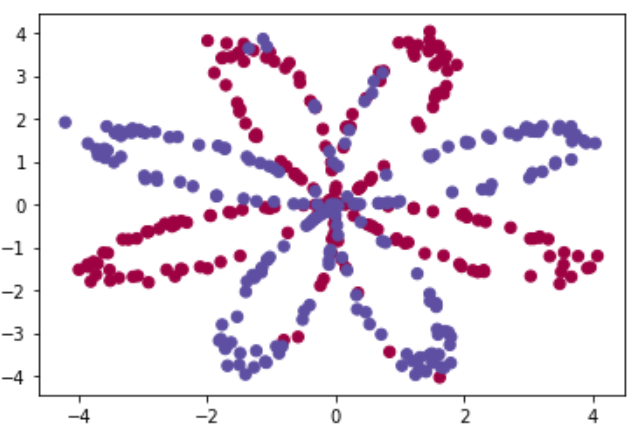

In [ ]:
# To check the dimensions
shape_X=X.shape
shape_Y=Y.shape
m=X.shape[1]
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

# Neural Network Model
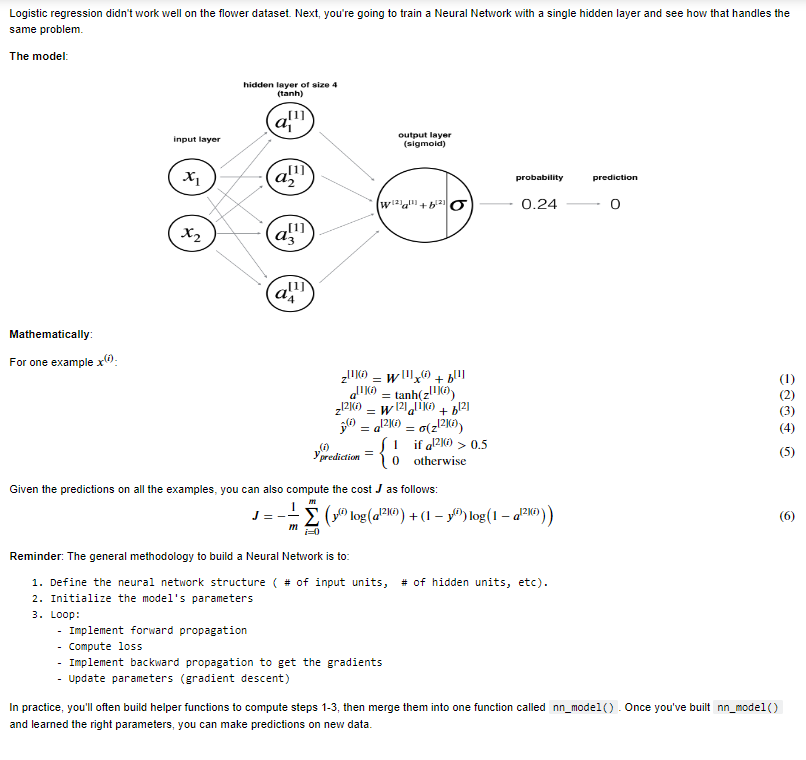

In [ ]:
# Code for defining neural network sizes
def layer_sizes(X, Y):
    n_x=X.shape[0]
    n_h=4
    n_y=Y.shape[0]
    return (n_x, n_h, n_y)

In [ ]:
# Code for initilazing the decision boundary function parameters
def initialize_parameters(n_x, n_h, n_y):

    W1=np.random.randn(n_h,n_x) * 0.01
    b1=np.zeros((n_h,1))
    W2=np.random.randn(n_y,n_h)* 0.01
    b2=np.zeros((n_y,1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [ ]:
## Code for forward_propagation
def forward_propagation(X, parameters):
   
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]

    Z1=np.dot(W1,X)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=sigmoid(Z2)

    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [ ]:
# Code for computing the cost
def compute_cost(A2, Y):
  
    m = Y.shape[1] # number of examples

    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),(1-Y))
    cost = - np.sum(logprobs)/m  

    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    
    return cost

In [ ]:
# Code for bacward propoagation to derie the derivatives
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1=parameters["W1"]
    W2=parameters["W2"]
     A1=cache["A1"]
    A2=cache["A2"]
    dZ2= A2-Y
    dW2= np.dot(dZ2,np.transpose(A1))/m
    db2= np.sum(dZ2,axis=1,keepdims=True)/m
    dZ1= np.dot(np.transpose(W2), dZ2)*(1-np.power(A1,2))
    dW1= np.dot(dZ1,np.transpose(X))/m
    db1= np.sum(dZ1, axis=1,keepdims=True)/m   
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [ ]:
# Parameter updating function
def update_parameters(parameters, grads, learning_rate = 1.2):
    W1=copy.deepcopy(parameters["W1"])
    b1=copy.deepcopy(parameters["b1"])
    b2=copy.deepcopy(parameters["b2"])
    W2=copy.deepcopy(parameters["W2"])
    dW1=grads["dW1"]
    db1=grads["db1"]
    dW2=grads["dW2"]
    db2=grads["db2"]
    W1=W1-learning_rate*dW1
    b1=b1-learning_rate*db1
    W2=W2-learning_rate*dW2
    b2=b2-learning_rate*db2
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [ ]:
# Code for building the neural networ. This code combines the above functions
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    parameters = initialize_parameters(n_x, n_h, n_y)
    for i in range(0, num_iterations):

        A2,cache= forward_propagation(X, parameters)
        cost= compute_cost(A2, Y)
        grads= backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate = 1.2)

        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [ ]:
# Code for predicting the values using the neural network and decision boundary as 0.5
def predict(parameters, X):

    A2,cache= forward_propagation(X, parameters)
    predictions = np.array(A2>0.5)
    
    return predictions